#### Getting Access
First, we need access by following these steps:

- Go to App Preferences https://www.reddit.com/prefs/apps and click "are you a developer? create an app..." at the top left of the page.
- Fill out the required details, make sure to select script — and click create app.
- make a note of the "personal use script" and "secret tokens". Later on there will be used as CLIENT_ID and CLIENT_SECRET.

<br>

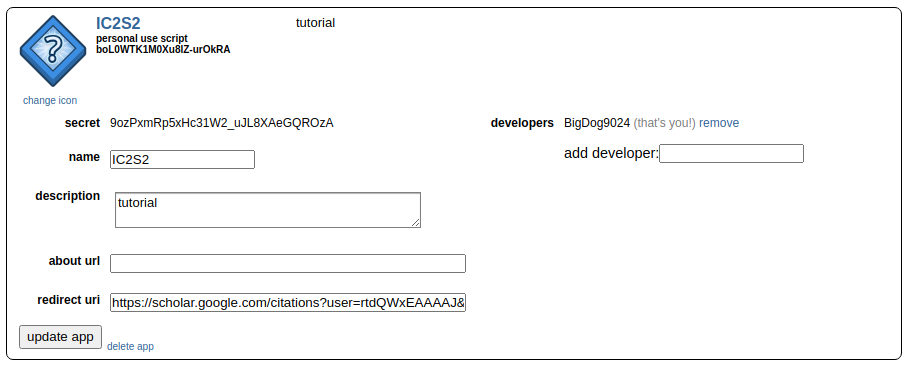




In [1]:
'''
python wrapper for crawling the reddit data, through reddit API
'''

import csv
import praw
from datetime import datetime
import datetime as dt
import time




client_id='<CLIENT_ID>'
client_secret='<CLIENT_SECRET>'
# your Reddit username and password
username='<USERNAME>'
password='<PASSWORD>


user_agent = 'redditcrawlerbot'


reddit = praw.Reddit(user_agent=user_agent,client_id=client_id,
                     client_secret=client_secret,
                     username=username, password=password)



subreddit = 'trumpservative'
with open("./%s_posts.csv"%(subreddit), mode='w') as file1, open("./%s_comments.csv" % (subreddit), mode='w') as file2:
    postfildnames = ['post_id', 'subreddit_id', 'title', 'body', 'author_name', 'created_utc','num_comments', 'score']
    commentfieldnames = ['body', 'author_name',  'created_utc', 'subreddit_id', 'link_id', 'parent_id','comment_id', 'subreddit']

    writer1 = csv.DictWriter(file1, fieldnames=postfildnames)
    writer1.writeheader()
    writer2 = csv.DictWriter(file2, fieldnames=commentfieldnames)
    writer2.writeheader()
    for submission in reddit.subreddit(subreddit).top(limit=None):
        datet = datetime.utcfromtimestamp(int(submission.created))

        
        writer1.writerow({'post_id': submission.id, 'subreddit_id':submission.subreddit_id, 'title':submission.title,
                          'body': submission.selftext, 'author_name':submission.author, 'created_utc':submission.created,
                          'num_comments':submission.num_comments, 'score': submission.score})
        try:
            submission.comments.replace_more(limit=None)
        except:
            print('error for the post %s'%submission.id)
            time.sleep(5)
            continue
        for comment in submission.comments.list():
            writer2.writerow(
                {'comment_id': comment.id, 'subreddit_id': comment.subreddit_id, 'parent_id': comment.parent_id,
                 'body': comment.body, 'author_name': comment.author, 'created_utc': comment.created,
                 'link_id': comment.link_id, 'subreddit': comment.subreddit})